<center> <h2> DS 3000 - Fall 2021</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3> Project Title</h3> </center>
<center><h4>Daniel O'Connor, Vivek Divakarla, Abyan Nawaz</h4></center>

<hr style="height:2px; border:none; color:black; background-color:black;">

In [ ]:
# shareable link
#https://colab.research.google.com/drive/1JM8fw5yTY99P67zdfcgnkW4yBjD_wYTT?usp=sharing

#### Executive Summary:

The topic of this project was to predict if the home team in an NBA game will cover the spread, based off of the 2020-2021 season. Being able to accurately predict this feature would solve the problem of risky sports betting by allowing the user to compare the predicted odds to the Vegas odds. 

Data was organized and wrangled to show the significance of certain features and their relation to the moneyline. The data was extracted from the website Sports Book Reviews Online and NBA.com.

To tackle this problem, first, the data was visualized into a series of graphs to better understand the correlation between certain variables. There are multiple variables that showed great correlation to winning a game and covering the spread; some of these variables include, effective field goal percentage, offensive rebound percentage and turnover percentage. 

The model was trained using multiple classification algorithms to guess if either, the team covers the spread or it does not (essentially winning or losing). Features were scaled and normalized as well as selected/checked for importance, at the end, a grid search was implemented to retrieve the best parameters to retrieve a classification accuracy of 57.68% using the Gaussian Naive Bayes algorithm.

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

The goal of our project is to predict if the home team covers the spread in a certain basketball game to help sports bettors. We
would also like to learn more about Vegas odds and how they skew odds in their favor. Using our predictions
and our gained insight on Vegas odds, we can better identify which betting lines are poorly constructed and
could be exploited. In essence, this would create a “money machine” that could repeatedly predict strong bets
for bettors to take advantage of.

Our dataset represents all NBA games from the 2020-2021 season. We have a few target variables, since
there are multiple items to bet on. These targets include money line data, spread, turnover percentage, effective field goal percentage per team and many more.  With these multiple features, we can analyze which teams are most likely to “cover the spread”which teams are likely to
contribute to a higher total score, which teams are most consistent to win as the favorite, etc. Using machine learning algorithms, we will be able to create a model that predicts whether a team covers the spread or not, as described above, and exploit certain aspects of it to hopefully, obtain a positive cash flow.

Questions that we had to answer to reach our conclusion:

    - What are the best features to predict the outcome of an NBA game?
    - What is a good dataset to use to predict the outcome of an NBA game?
    - How can we use our prediction against the Vegas prediction to make a profit?
    - Which variables have the best correlation with eachother to use in our model?
    - Which machine learning algorithim is the best for our project?
        - GaussianNB?
        - Decision Tree?
        - KNN?
        - Linear SVC?
        - XGB?
    - How will we tune our algorithim to elicit the best possible results?
    - What does our final interpretaion of our results look like?


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

In [ ]:
import csv
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

In [ ]:
import pandas as pd

#Read in data from CSV

url = "https://raw.githubusercontent.com/awesom24/DS3000Project_Group30/main/nba%20odds%202020-21.csv"
odds = pd.read_csv(url)

#Drop columns that we don't need
odds = odds.drop(columns = ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', '1st', '2nd', '3rd', '4th'])
odds.head(5)

,Date,Rot,VH,Team,Final,Open,Close,ML,2H
0,1222,501,V,GoldenState,99,228,234.5,265,1
1,1222,502,H,Brooklyn,125,5.5,7.5,-320,115
2,1222,503,V,LAClippers,116,223,219,115,108.5
3,1222,504,H,LALakers,109,2.5,2,-135,3.5
4,1223,551,V,Charlotte,114,215,3,-140,7


In [ ]:
# Get four factors table (key stats)
four_URL = "https://raw.githubusercontent.com/awesom24/DS3000Project_Group30/main/updated4factors%20-%20Sheet2.csv"
fourfactors = pd.read_csv(four_URL)
fourfactors.head(5)

,Unnamed: 0,GP,W,L,WIN%,MIN,EFG%,FTA\nRATE,TOV%,OREB%,OPP\nEFG%,OPP\nFTA RATE,OPP\nTOV%,OPP\nOREB%
0,Atlanta,72,41,31,0.569,"3,481",53.9,0.278,13.3,28.4,53.0,0.237,12.4,25.8
1,Boston,72,36,36,0.500,"3,476",54.3,0.234,14.1,28.9,53.9,0.273,14.2,26.3
2,Brooklyn,72,48,24,0.667,"3,481",57.5,0.258,13.4,25.2,53.1,0.241,12.5,27.4
3,Charlotte,72,33,39,0.458,"3,471",53.2,0.238,14.9,27.6,55.0,0.219,14.8,27.8
4,Chicago,72,31,41,0.431,"3,476",54.7,0.197,15.1,26.7,53.8,0.253,12.7,23.3


We obtained our data from https://www.sportsbookreviewsonline.com/scoresoddsarchives/nba/nbaoddsarchives.htm. We decided to use the 2020-2021 NBA Season in order to have a full season of games as our sample size. From the website, we just downloaded the 'NBA 2020-21' CSV, and read it in to our notebook.

For each game of the 2021 NBA Season, the dataset has the Teams, Final Score, Spread, MoneyLine, and Totals. Below in section 3.1 we add a few more tables as well, as well as organize it so that each game just has one row. We have a few target variables, since there are multiple items to bet on. These targets include home team money line, away team money line, total game score, and spread. The features are the home team, away team, home score, and away score. With these four features, we can analyze which teams are most likely to “cover the spread”, which teams are likely to contribute to a higher total score, which teams are most consistent to win as the favorite, etc. 

In our second dataset, we have 2020-2021 advanced stats for each team, specifically the 'Four Factors'. According to Dean Oliver, there are four specific stats which relate to team success, and each have different weights. In his original writing, he had Scoring (40%), Turnovers (25%), Rebounding (15%), and Free Throws (15%). For each of these, we took stats from the NBA.com website and made it a dataframe. These stats were found here: https://www.nba.com/stats/teams/four-factors/?sort=GP&dir=-1&Season=2020-21&SeasonType=Regular%20Season. EFG% stands for Effective Field Goal Percentage, TOV% stands for Turnover Rate, FTA Rate stands for Free Throw Attempt Rate, and OREB% is the percentage of Offensive Rebounds each team gets. We also have these stats for each team's opponents, which showcases how good a team is defensively. When put together, we can get a true metric of the strength of the team. 

### 2.2. Data Analysis
* For target variable, we will be using the variable: "Home Covers Spread?" This can either be a 1 or a 0 (true or false). The feature variables we are using are: EFG%, TO%, FTA, OREB% for both home team and away team, similary we will also have data that tells us how a team affects its opponents, EFG%, TO%, FTA and OREB%. With these features, we can analyze which teams are most likely to cover the spread. These features are important because with these features we are able to see who won the games in the past, if they won by a lot, and what Vegas predicted the winner to be previously.
* This is a supervised machine learning problem because we are using specified labeled data as our inputs and expecting an output based on our training data (the inputs). The subset of supervised machine learning we are training in this project is classification.
* The five algorithms that we are going to be testing are:
  
    *  Guassian Naive Bayes: For Naive Bayes, we assume that all feature variables are independent of one another. While this may be a hard assumption to make given the interconnectedness of our data, we are interested in seeing if Naive Bayes can still prove to be a viable option in predicting bets.
    *  K Nearest Neighbors: An algorithm that groups the targets based on their distance from each other. We are using this because it is a standard classification algorithm and works for our data; if a team has high percentages and wins a lot, teams similar to it will expectedly have the same outcome.
    *  Decision Tree: Finally, for decision tree, we make no assumptions. We are using this model because it is most similar to how humans think (Team A beat team B, so they must beat team C). 
    *  Linear SVC: Fit to the data we have returning the best fit hyperplane that divides our data. Then classifying the target variables by the features we give it. We are using this because we think from the graphs we have, we can see a direct separation between classes, more accurately made by a computer. 
    *  XGBoost: XGBoost, is another form of descision tree algorithims where it uses weaker and simpler algorithms to make a prediction on the target variable. We decided to use this as it may prove to be a stronger version of the decision tree.
* For feature extraction, we plan on using RFE, similary, using MinMaxScaler, selection and grid search to improve our model.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

#### Moving each game to its own row

In [ ]:
i = 0
newodds = pd.DataFrame(columns = ['Date','GameID','HomeTeam', 'AwayTeam','HomeFinal', 'AwayFinal', 'HomeML', 'AwayML', 'Spread','Total','2HSpread','2HTotal'])
# Iterate thru rows to combine two rows into one game
while i<2342:
    ser = pd.Series(dtype=object)
    ser['Date'] = odds.loc[i]['Date']
    ser['GameID'] = i/2
    ser['HomeTeam'] = odds.loc[i+1]['Team']
    ser['AwayTeam'] = odds.loc[i]['Team']
    ser['HomeFinal'] = odds.loc[i+1]['Final']
    ser['AwayFinal'] = odds.loc[i]['Final']
    ser['HomeML'] = odds.loc[i+1]['ML']
    ser['AwayML'] = odds.loc[i]['ML']
    x = odds.loc[i+1]['Close']
    if x == "pk":
        x = float(0)
    else:
        x = float(x)
    y = odds.loc[i]['Close']

    # Sort out over/unders and spreads
    if(y == "pk"):
        y = float(0)
    else:
        y = float(y)
    if (x < float(50)): 
        spread = x
        overunder = y
    else: 
        spread = y
        overunder = x
    if(float(ser['HomeML']) < float(ser['AwayML'])):
        spread = spread * -1
    ser['Spread'] = spread
    ser['Total'] = overunder 

    # 2nd half spread/over under
    x2 = odds.loc[i]['2H']
    y2 = odds.loc[i+1]['2H']
    if(x2 == "pk"):
        x2 = float(0)
    else:
        x2 = float(x2)
    if(y2 == "pk"):
        y2 = float(0)
    else:
        y2 = float(y2)  
    if (x2 < float(50)): 
        spread2 = x2
        overunder2 = y2     
    else: 
        spread2 = y2
        overunder2 = x2
    if(float(ser['HomeML']) < float(ser['AwayML'])):
        spread2 = spread2 * -1
    ser['2HSpread'] = spread2
    ser['2HTotal'] = overunder2
    newodds = newodds.append(ser, ignore_index=True)
    i+=2

#### Adding new columns

In [ ]:
newodds['Point Differential'] = newodds['AwayFinal'] - newodds['HomeFinal']
newodds['RealTotal'] = newodds['AwayFinal'] + newodds['HomeFinal']
newodds['Home Covers Spread?'] = newodds['Point Differential'] < newodds['Spread']
newodds["Over Total?"] = newodds['RealTotal'] > newodds['Total']

# Convert true/false to 1 and 0
tf_dict = {True: 1, False: 0}
newodds['Home Covers Spread?'].replace(tf_dict, inplace = True)
newodds["Over Total?"].replace(tf_dict, inplace = True)

#Converting odds from American to Decimal
def oddsconvert(x):
    if float(x)>0:
        y = float(x)/100 + 1
    else: 
        y = 1 + (100 / (float(x)*-1))
    return y

In [ ]:
# Create dictionary mapping each team to an ID. These IDs match the indices of the four factors table
teamToId = {"Atlanta": 0, "Boston": 1, "Brooklyn": 2, "Charlotte": 3, "Chicago": 4, "Cleveland": 5, "Dallas": 6, 
"Denver": 7, "Detroit": 8, "GoldenState": 9, "Houston": 10, "Indiana": 11, "LAClippers": 12, "LALakers": 13, "Memphis": 14,
"Miami": 15, "Milwaukee": 16, "Minnesota": 17, "NewOrleans": 18, "NewYork": 19, "OklahomaCity": 20, "Orlando": 21, "Philadelphia": 22, 
"Phoenix": 23, "Portland": 24, "Sacramento": 25, "SanAntonio": 26, "Toronto": 27, "Utah": 28, "Washington": 29}

In [ ]:
# Add columns representing the decimal odds
newodds['AwayML_Decimal'] = newodds['AwayML'].apply(oddsconvert).round(3)
newodds['HomeML_Decimal'] = newodds['HomeML'].apply(oddsconvert).round(3)
newodds

,Date,GameID,HomeTeam,AwayTeam,HomeFinal,AwayFinal,HomeML,AwayML,Spread,Total,2HSpread,2HTotal,Point Differential,RealTotal,Home Covers Spread?,Over Total?,AwayML_Decimal,HomeML_Decimal
0,1222.0,0.0,Brooklyn,GoldenState,125,99,-320,265,-7.5,234.5,-1.0,115.0,-26,224,1,0,3.650,1.312
1,1222.0,1.0,LALakers,LAClippers,109,116,-135,115,-2.0,219.0,-3.5,108.5,7,225,0,1,2.150,1.741
2,1223.0,2.0,Cleveland,Charlotte,121,114,120,-140,3.0,217.0,7.0,107.0,-7,235,1,1,1.714,2.200
3,1223.0,3.0,Indiana,NewYork,121,107,-330,270,-7.5,215.5,-7.5,107.5,-14,228,1,1,3.700,1.303
4,1223.0,4.0,Orlando,Miami,113,107,170,-190,4.5,219.0,5.0,106.5,-6,220,1,1,1.526,2.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,708.0,1166.0,Phoenix,Milwaukee,118,108,-180,160,-4.5,221.0,-1.5,112.0,-10,226,1,1,2.600,1.556
1167,711.0,1167.0,Milwaukee,Phoenix,120,100,-210,180,-4.5,220.0,-3.0,113.0,-20,220,1,0,2.800,1.476
1168,714.0,1168.0,Milwaukee,Phoenix,109,103,-190,170,-4.5,221.0,-3.0,113.5,-6,212,1,0,2.700,1.526
1169,717.0,1169.0,Phoenix,Milwaukee,119,123,-170,150,-4.0,220.0,-4.0,112.5,4,242,0,1,2.500,1.588


In [ ]:
fourfactors = pd.read_csv("updated4factors - Sheet2.csv")

In [ ]:
# Convert city names to IDs from teamToId dictionary
newodds["HomeTeam"].replace(teamToId, inplace=True)
newodds["AwayTeam"].replace(teamToId, inplace=True)
newodds

,Date,GameID,HomeTeam,AwayTeam,HomeFinal,AwayFinal,HomeML,AwayML,Spread,Total,2HSpread,2HTotal,Point Differential,RealTotal,Home Covers Spread?,Over Total?,AwayML_Decimal,HomeML_Decimal
0,1222.0,0.0,2,9,125,99,-320,265,-7.5,234.5,-1.0,115.0,-26,224,1,0,3.650,1.312
1,1222.0,1.0,13,12,109,116,-135,115,-2.0,219.0,-3.5,108.5,7,225,0,1,2.150,1.741
2,1223.0,2.0,5,3,121,114,120,-140,3.0,217.0,7.0,107.0,-7,235,1,1,1.714,2.200
3,1223.0,3.0,11,19,121,107,-330,270,-7.5,215.5,-7.5,107.5,-14,228,1,1,3.700,1.303
4,1223.0,4.0,21,15,113,107,170,-190,4.5,219.0,5.0,106.5,-6,220,1,1,1.526,2.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,708.0,1166.0,23,16,118,108,-180,160,-4.5,221.0,-1.5,112.0,-10,226,1,1,2.600,1.556
1167,711.0,1167.0,16,23,120,100,-210,180,-4.5,220.0,-3.0,113.0,-20,220,1,0,2.800,1.476
1168,714.0,1168.0,16,23,109,103,-190,170,-4.5,221.0,-3.0,113.5,-6,212,1,0,2.700,1.526
1169,717.0,1169.0,23,16,119,123,-170,150,-4.0,220.0,-4.0,112.5,4,242,0,1,2.500,1.588


In [ ]:
def getFFStat(teamId, col):
    """Obtains four factor stat given team id and column name
    
        Args:
            teamId (number): The team id according to the teamToID dictionary
            col (String): The column in the four factor DataFrame representing the desired statistic
            
        Returns:
            stat (number): The four factor statistic of the given teamId
    """
    stat = fourfactors.loc[teamId, col]
    return stat

In [ ]:
# Create new columns for every four factor stat
columns = ['WIN%', 'EFG%', 'FTA\nRATE', 'TOV%', 'OREB%', 'OPP\nEFG%', 'OPP\nFTA RATE', 'OPP\nTOV%', 'OPP\nOREB%']
for column in columns:
    homeStr = "Home" + column
    awayStr = "Away" + column
    newodds[homeStr] = newodds["HomeTeam"].apply(getFFStat, args = (column, ))
    newodds[awayStr] = newodds["AwayTeam"].apply(getFFStat, args = (column, ))
newodds

,Date,GameID,HomeTeam,AwayTeam,HomeFinal,AwayFinal,HomeML,AwayML,Spread,Total,...,HomeOREB%,AwayOREB%,HomeOPP\nEFG%,AwayOPP\nEFG%,HomeOPP\nFTA RATE,AwayOPP\nFTA RATE,HomeOPP\nTOV%,AwayOPP\nTOV%,HomeOPP\nOREB%,AwayOPP\nOREB%
0,1222.0,0.0,2,9,125,99,-320,265,-7.5,234.5,...,25.2,22.2,53.1,52.2,0.241,0.286,12.5,14.6,27.4,27.3
1,1222.0,1.0,13,12,109,116,-135,115,-2.0,219.0,...,26.9,27.0,52.6,53.1,0.237,0.239,15.2,13.2,25.2,24.6
2,1223.0,2.0,5,3,121,114,120,-140,3.0,217.0,...,28.0,27.6,55.6,55.0,0.235,0.219,14.5,14.8,27.1,27.8
3,1223.0,3.0,11,19,121,107,-330,270,-7.5,215.5,...,24.7,26.4,53.1,50.9,0.258,0.257,14.4,13.1,29.9,26.2
4,1223.0,4.0,21,15,113,107,170,-190,4.5,219.0,...,25.2,24.0,54.7,54.2,0.215,0.234,12.8,15.4,25.6,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,708.0,1166.0,23,16,118,108,-180,160,-4.5,221.0,...,24.8,26.9,53.4,53.6,0.250,0.202,13.7,12.7,25.9,24.5
1167,711.0,1167.0,16,23,120,100,-210,180,-4.5,220.0,...,26.9,24.8,53.6,53.4,0.202,0.250,12.7,13.7,24.5,25.9
1168,714.0,1168.0,16,23,109,103,-190,170,-4.5,221.0,...,26.9,24.8,53.6,53.4,0.202,0.250,12.7,13.7,24.5,25.9
1169,717.0,1169.0,23,16,119,123,-170,150,-4.0,220.0,...,24.8,26.9,53.4,53.6,0.250,0.202,13.7,12.7,25.9,24.5


### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph. In other words, what does the graph represent?
* Insert your visualizations as images as well (upload the graph images to an online source, e.g. github or imgbb, and embed those into the cells in Jupyter Notebook, similar to HWs). This is a requirement.

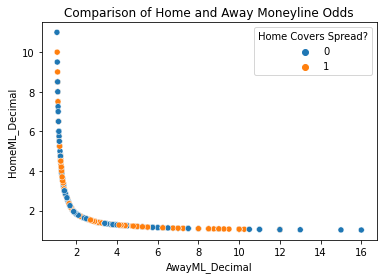

In [ ]:
# Graph 1

sns.scatterplot(x = 'AwayML_Decimal', y = 'HomeML_Decimal', data = newodds, 
                hue = 'Home Covers Spread?').set_title("Comparison of Home and Away Moneyline Odds")

<img src = "https://i.ibb.co/6nfTvkc/Screen-Shot-2021-12-02-at-5-11-58-PM.png" width=400/>

#### Graph 1 Explanation

This graph is showing a distribution of the Odds for each game of the 2020-2021 NBA season. Here, the
odds are converted to decimal from american odds. For example, if the money line of a team is 2.2, you
would receive 22 from a 10 bet if it won (a profit of 12). In the American odds system, the moneyline
would be +120 instead of 2.2. The difference in the dot colors is whether the home team covers the spread.
Covering the spread is where a team won or by a predetermined margin of points, typically set by Vegas
oddsmakers. If a team was +5, they would cover the spread if they won or if they lost by less than 5. Some
interesting trends on this graph are where the big clusters of orange dots are. One of these is when the
Home team moneyline is between 3 and 5. This means the team was a slight underdog, and the
overwhelming majority of orange dots means that they had a very high probability of covering their
pregame spread. Another one of these clusters shows up when the Away team moneyline is between 8 and
10. A moneyline at 8 would payout 8 to 1, so these teams are massive underdogs. This cluster of dots also
shows that the Home team covers at an overwhelming rate, even though the spread is much bigger. These
graphs can help us identify trends in the sports betting market, and help us build our models.

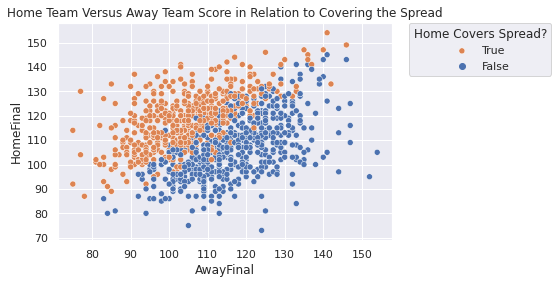

In [ ]:
#Graph 2

sns.set(style="darkgrid")
sns.scatterplot(x = 'AwayFinal', y = 'HomeFinal', data = newodds,
hue = 'Home Covers Spread?').set_title("Home Team Versus Away Team Score in Relation to Covering the Spread")
plt.legend(title='Home Covers Spread?', labels=['True', 'False'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<img src = "https://i.ibb.co/myck5yV/Screen-Shot-2021-12-02-at-5-18-24-PM.png" width=400/>

#### Graph 2 Explanation
In this graph here, “Home Team Versus Away Team Score in Relation to Covering the Spread,” there is an
interesting point to be made about the distribution of points. Each point on the graph represents an NBA
game played in the 2020-2021 season. The y-axis in this graph is the home team’s final score, and the
x-axis represents the away team’s final score. This can be interpreted as if a point seems higher on the
graph than it is to the right, the home team wins. The color of each dot is important to note as well, the
blue color represents when the home team does not cover the spread. The orange dot represents when the
home team does cover the spread. When a team covers the spread it means this, for example, there is a
game being played by Team A and Team B, the spread of this game is +4 in favor of Team A, which means
it is -4 for Team B. A simple way to understand this is, if a team is not the favored team (Team B), then
they get a 4 point handicap, basically meaning they would start the game with a 4-0 start (in the betting
world). This means Team A is better because they are expected to overcome this gap and still win. What
this graph shows us is the distribution of the points. We can see that if the home team wins then they are
most likely to cover the spread. This helps us understand two things that help shape our model, the home
team can be reasonably expected to be favored (as long as the teams are not a clear mismatch in skill),
which also helps show us that more often than not, if there is not a rather large discrepancy between the
teams skill, the Vegas odds will most likely favor the home team because of home court advantage. This is
all noticeable because the orange points are more often than not above the blue points on the left side of
the graph. Remember from before, if the point is higher up than it is to the right, we can easily see that the
home team won. These are some important features we see from this graph and will help us in defining
key features in our model.

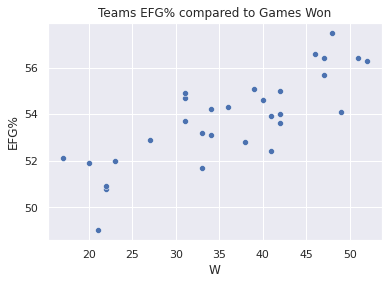

In [ ]:
#Graph 3

sns.set(style="darkgrid")
sns.scatterplot(x = 'W', y = 'EFG%', data = fourfactors).set_title("Teams EFG% compared to Games Won")

<img src = https://i.ibb.co/z6DgcGT/Screen-Shot-2021-12-07-at-5-03-19-PM.png width=400/>

#### Graph 3 Explanation

In this graph we are comparing a teams effective field goal percentage with the number of wins they had in the regular season. On the y-axis we have the EFG% and the x-axis we have the total wins per team. Each dot on the graph represents a team. We see a pretty strong positive correlation between these two variables. The higher the teams EFG% is the more wins they will have. This is super important for our model as we are essentially trying to figure out which team is going to win. This EFG% stat is basically the % of shots that a team takes that goes in, so with that being said, if you make more than 56% of your shots, you are most likely going to win a lot, and we see this reflected on the graph. Similarly, we see that teams with below a 50% EFG rating are the teams with less than 25 wins. This is a super important stat for our model and are implementing it.

In [ ]:
#Graph 4



<img src = "https://i.ibb.co/HKM1yvP/Screen-Shot-2021-12-08-at-2-52-56-PM.png" width=400/>

In this graph we have feature importance. If you scroll down a bit in 3.3, you will see the code for this graph in a cell with a comment above saying "feature importance graph". Before selecting features, we decided to use feature importance using the XGBoost algorithim due to its strong classification accuracy. In this we can see the featuers on the bottom and the importance on the y-axis. The features are not labeled but if we count from the right, we know that features: 1,3, 8, 9 and 11 show the most importance. These features are: AwayOPP OREB% (away opponents offensive rebound percentage), AwayOPP TOV% (away opponents turnover percentage), AwayOpp EFG%, (away opponents effective field goal percentage), AwayTOV% (away turnover percentage) and AwayOREB% (away offensive rebound percentage). These features actually tell us a lot. The fact that home teams win 60% of NBA games and the most importance features is the away team's ability to hinder an opponent's offense and rebounding is indicivative to what the factors we are using show. This helps reinforce the idea that it is important to look at the features of the underdog, because if you were to standarize the game and play in a neutral court, the better team will come out on top, and the better team is the one that can hinder the other team worse and keep the ball longer. These results make a lot of sense and will help tune our model appropriately. Once again, the code for this graph and the XGB classifier we used to select these features is down below a couple cells.

### 3.3 Model Training and Testing

In [ ]:
#using classification algorithims takes ~12 mins to run

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC


estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LinearSVC': LinearSVC(max_iter=1000000),
 }

from sklearn.model_selection import train_test_split

features = newodds.drop(["Date", "GameID", "HomeTeam", "AwayTeam", "HomeFinal", "AwayFinal", "Total", "2HSpread",
"2HTotal", "Point Differential", "RealTotal", "Home Covers Spread?", "Over Total?",
"HomeML", "AwayML", "AwayML_Decimal", "HomeML_Decimal"], axis = 1)
target = newodds['Home Covers Spread?']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
    
for estimator_name, estimator_object in estimators.items():
    
    
    clf = estimator_object.fit(X=X_train, y=y_train)
        
    accuracy = estimator_object.score(X_test, y_test)
    
    print(estimator_name + ": \n\t" + f'Classification accuracy on the test data:{accuracy:.2%}' + "\n")

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=3000, shuffle=True)
    
    scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
    print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' 
            + f'standard deviation={scores.std():.2%}' +"\n")

	

k-Nearest Neighbor: 
	Classification accuracy on the test data:50.17%

Gaussian Naive Bayes: 
	Classification accuracy on the test data:57.68%

Decision Tree: 
	Classification accuracy on the test data:51.54%

LinearSVC: 
	Classification accuracy on the test data:55.97%

k-Nearest Neighbor: 
	mean accuracy=53.38%, standard deviation=4.36%

Gaussian Naive Bayes: 
	mean accuracy=56.79%, standard deviation=4.26%

Decision Tree: 
	mean accuracy=51.92%, standard deviation=4.35%

LinearSVC: 
	mean accuracy=56.96%, standard deviation=2.95%



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/python/envs/def

[21:31:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.04519
Feature: 1, Score: 0.06715
Feature: 2, Score: 0.05996
Feature: 3, Score: 0.05779
Feature: 4, Score: 0.05313
Feature: 5, Score: 0.05071
Feature: 6, Score: 0.05600
Feature: 7, Score: 0.05008
Feature: 8, Score: 0.04324
Feature: 9, Score: 0.04265
Feature: 10, Score: 0.05036
Feature: 11, Score: 0.05970
Feature: 12, Score: 0.05525
Feature: 13, Score: 0.05124
Feature: 14, Score: 0.06260
Feature: 15, Score: 0.05190
Feature: 16, Score: 0.05113
Feature: 17, Score: 0.04050
Feature: 18, Score: 0.05144
Classification accuracy on the test data:55.63%



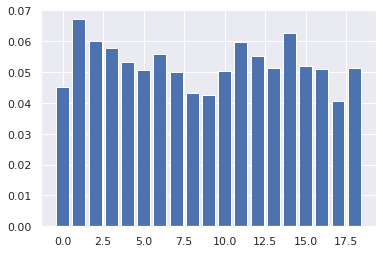

In [ ]:
# xgboost and feature importance graph

from matplotlib import pyplot
from xgboost import XGBClassifier


model = XGBClassifier(use_label_encoder=False)

model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

print( f'Classification accuracy on the test data:{accuracy:.2%}' + "\n")


### 3.4. Model Optimization

We are optimizing here to see if we can improve model performance from above. Our variables are all percentages based out of 100% so most of them are scaled properly, but we will see if any significant increases arise from doing so. There has been no overfitting and underfitting threats thus far.

In [ ]:
## scaling/selected and fitting the data 



scaler = MinMaxScaler()

scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

estimators2 = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LinearSVC': LinearSVC(max_iter=1000000)}
    
for estimator2_name, estimator2_object in estimators2.items():
    
    
    clf = estimator2_object.fit(X=X_train_scaled, y=y_train)
        
    accuracy = estimator2_object.score(X_test, y_test)
    
    print(estimator2_name + ": \n\t" + f'Classification accuracy on the test data:{accuracy:.2%}' + "\n")

k-Nearest Neighbor: 
	Classification accuracy on the test data:45.05%

Gaussian Naive Bayes: 
	Classification accuracy on the test data:44.37%

Decision Tree: 
	Classification accuracy on the test data:44.37%

LinearSVC: 
	Classification accuracy on the test data:44.37%



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [ ]:
model = XGBClassifier(use_label_encoder=False)

model.fit(X_train_scaled, y_train)

accuracy = model.score(X_test, y_test)

print(f'Classification accuracy on the test data:{accuracy:.2%}' + "\n")

[21:32:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification accuracy on the test data:51.19%



In [ ]:



from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor


select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 5)

select.fit(X_train_scaled, y_train)

X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

estimators3 = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LinearSVC': LinearSVC(max_iter=1000000)}
    
for estimator3_name, estimator3_object in estimators3.items():
    
    
    clf = estimator3_object.fit(X=X_train_selected, y=y_train)
        
    accuracy = estimator3_object.score(X_test_selected, y_test)
    
    print(estimator3_name + ": \n\t" + f'Classification accuracy on the test data:{accuracy:.2%}' + "\n")

    
a = features.columns
b = select.get_support()

    
    
print("Selected features after RFE:")
    
for col, tf in zip(a, b):  
    if tf:
        print("\t", col)

k-Nearest Neighbor: 
	Classification accuracy on the test data:50.51%

Gaussian Naive Bayes: 
	Classification accuracy on the test data:55.97%

Decision Tree: 
	Classification accuracy on the test data:54.27%

LinearSVC: 
	Classification accuracy on the test data:52.90%

Selected features after RFE:
	 Spread
	 HomeFTA
RATE
	 HomeTOV%
	 AwayTOV%
	 AwayOPP
TOV%


In [ ]:

model = XGBClassifier(use_label_encoder=False)

model.fit(X_train_selected, y_train)

accuracy = model.score(X_test_selected, y_test)

print(f' XGB Classification accuracy on the test data:{accuracy:.2%}' + "\n")

[21:33:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 XGB Classification accuracy on the test data:54.61%



### 3.4/3.5 More Optimization/Testing

In [ ]:
#grid searching for KNN
param_grid = {"n_neighbors":[3, 5, 11, 19], "metric": ["euclidean", "manhattan", "minkowski"], "weights": ["uniform", "distance"]}

, 
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    
grid_search.fit(X=X_train_selected, y=y_train)
    
    
print("Best parameters: ", grid_search.best_params_)


print("Training set score with best parameters: ", grid_search.score(X_train_selected, y_train))
print("Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Training set score with best parameters:  0.6104783599088838
Test set score with best parameters:  0.5426621160409556


In [ ]:
#grid searching for Gaussian NB

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
    
grid_search.fit(X=X_train_selected, y=y_train)
    
    
print("Best parameters: ", grid_search.best_params_)


print("Training set score with best parameters: ", grid_search.score(X_train_selected, y_train))
print("Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))

Best parameters:  {'var_smoothing': 0.02848035868435802}
Training set score with best parameters:  0.5398633257403189
Test set score with best parameters:  0.5597269624573379


In [ ]:
#grid searching for Decision tree

#grid searching for KNN
param_grid = {'criterion':['gini','entropy'] , "max_depth": [150]}

, 
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    
grid_search.fit(X=X_train_selected, y=y_train)
    
    
print("Best parameters: ", grid_search.best_params_)


print("Training set score with best parameters: ", grid_search.score(X_train_selected, y_train))
print("Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))

Best parameters:  {'criterion': 'entropy', 'max_depth': 150}
Training set score with best parameters:  0.9943052391799544
Test set score with best parameters:  0.515358361774744


In [ ]:
#grid searching for Linear SVC

#grid searching for KNN
param_grid = {'C':[1,10,100,1000]}


grid_search = GridSearchCV(LinearSVC(max_iter=1000000), param_grid, cv=5)
    
grid_search.fit(X=X_train_selected, y=y_train)
    
    
print("Best parameters: ", grid_search.best_params_)


print("Training set score with best parameters: ", grid_search.score(X_train_selected, y_train))
print("Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))

Best parameters:  {'C': 10}
Training set score with best parameters:  0.5444191343963554
Test set score with best parameters:  0.5290102389078498


In [ ]:

#grid searching for XGB classifier, takes around 30 mins to run

param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='auc'), param_grid, cv=5)
    
grid_search.fit(X=X_train_selected, y=y_train)
    
    
print("Best parameters: ", grid_search.best_params_)


print("Training set score with best parameters: ", grid_search.score(X_train_selected, y_train))
print("Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))

Best parameters:  {'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8}
Training set score with best parameters:  0.683371298405467
Test set score with best parameters:  0.5665529010238908


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.3, 3.4, and 3.5
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance? With what parameters?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)

* Discuss the ethical implications of your project. Should your results be accepted at face value, why or why not? (e.g. any dataset bias or methodological issues?)

* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

The algorithms we compared in this problem are: K Nearest Neighbors, Gaussian Naive Bayes, Linear SVC, Decision Trees and XGBoost. The algorithm that revealed the best performance was Gaussian Naive Bayes with no scaled or selected features at an accuracy of 57.68%. When using k-fold, it had a mean accuracy of 56.79% with standard deviation of 4.26%. When the features were normalized, a decrease in performance was seen (44.37%). Then with selected features, it increased to 55.97%, which is still a decrease from the initial accuracy. Then with grid search for parameters, an accuracy of 56% was seen ('var_smoothing': 0.02848035868435802). So, with the default parameters and initial features of our data, we see an accuracy of 57.68% from the Gaussian Naive Bayes algorithm.

Another algorithm with promising results was XGBoost, it started with an accuracy of 55.63%. Then with normalized features, 51.19%. Then with selected features: 54.61%. And finally, after grid searching, an accuracy of 56.6% was seen with parameters: ('colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8). The final accuracy of 56.65% was just .14%. short of Gaussian Naive Bayes, still a promising algorithm for this problem nonetheless. Linear SVC also showed promising results but not as good as these two.


The algorithms we should use for this problem would be Gaussian Naive Bayes. This model can be used to predict if the home team covers the spread, but it should not be the only factor if you were to make a smart decision. The model predicts with ~60% accuracy which is better than a coin flip, so statistically speaking, you would net profit if the model was true to this number, but as we know in statistics, this is not always the case. All in all, you should use this model as another factor in your decision, one that has a good amount of weight but, not your only telltale sign. 

Gambling is a dangerous activity that can lead to bankruptcy and mental health issues. You should not use this model if you are getting into gambling, and gambling is not an advisable strategy to make money. If used for recreational purposes with low amounts of money, then you may proceed, but be wary of the slippery slope that many fall down when they start gambling. Gambling hotline: 1-800-327-5050

Interestingly, when we performed RFE, the extracted features were Home FTA rate, Home TOV%, Away TOV%, and Away Opp TOV%. While turnover percentage (TOV%) is certainly an important factor, it is unclear why the home team's TOV%, away team's TOV%, and away team's average opponent TOV% were all considered important features, but the home team's average opponent TOV% was not. This same principle goes for FTA rate, as it doesn't make sense that Home FTA rate would be more important than Away FTA rate. Despite having a large number of feature variables, our models were unable to predict if a team would cover the spread at high accuracy. For future analysis, we could take a closer look at the most important features and narrow down our list. For example, perhaps home FTA rate is not as important of a factor as we previously thought. Removing this variable could increase the performance of the model. On the other hand, maybe home FTA rate is a key factor and a different feature ought to be removed. While we experimented with taking a few features out here and there, we did not have sufficient time to perform a complex analysis on the best combination of features. 

Since predicting whether or not the home team would cover the spread proved to be inconclusive, future analysis could focus in more on the money line rather than the spread. For example, we could use regression models to predict what the money line "should be". In cases where the Vegas money line was significantly better than the model-predicted line, it could be advantageous to bet on the Vegas line. Still, there is no guarantee that these models would perform better than our spread models, and the aforementioned feature analysis would still need to be conducted.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
 - Dan - Research, Section 2, Section 3, Section 4; extracted data, wrangled data, organized data, created functions for data, help scaled and tested algorithms, wrote up parts of conclusion.
- Vivek - Research, Section 2, Section 3, Section 4; extracted data, wrangled data, organized data, created functions for data, help scaled and tested algorithms, wrote up parts of conclusion.
- Abyan - Research ,Section 1, Section 3, Section 4; wrote intro and executive summary, trained, scaled, selected, grid searched and tested algorithms, wrote up parts of conclusion.